<a href="https://colab.research.google.com/github/lmbd92/st1800-st1801-trabajo3-2261/blob/main/Trabajo3Lina_Jose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes: Lina Beltrán (lbeltra1@eafit.edu.co), Jose Muñoz (jjmunozm@eafit.edu.co)

Materia: Alm. & Recu. de información.

Trabajo 3

Universidad EAFIT - Maestria ciencia en datos y analítica

Trabajo 2 Unidad 2 recuperación de texto

Data: https://github.com/lmbd92/st1800-st1801-trabajo3-2261/blob/main/Trabajo3/twitter.txt

# Abrir archivos desde GitHub

In [1]:
# OJO!!!! Ejecutar este bloque una sola vez (Por cada sesión iniciada)

!git clone -l -s https://github.com/lmbd92/st1800-st1801-trabajo3-2261.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 96 (delta 54), reused 17 (delta 5), pack-reused 0
Unpacking objects: 100% (96/96), done.
/content/cloned-repo
LICENSE    Trabajo3		    twitterClimateData.csv.zip
README.md  Trabajo3Lina_Jose.ipynb


In [2]:
# Delete repo local colab (Usar solo en caso de requerir actualizar el repo desde Github Nuevamente)

#!rm -r /content/cloned-repo

**Nota:** Para guardar el notebook directamente en Github, dirigirse a File→Save a copy in GitHub

# Preparación de ambiente de trabajo (Dependencias/librerias)

In [3]:
# Transmisión eficiente de archivos muy grandes desde/hacia almacenamientos como S3, GCS, Azure Blob Storage, HDFS, WebHDFS
!pip install smart-open

# Modelado y procesamiento NLP
!pip install --upgrade gensim
!pip install nltk

# Interpretar el tema en un modelo de temas que se ha ajustado a un corpus
!pip install pyLDAvis

     |████████████████████████████████| 24.1 MB 2.0 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 1.7 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=4a9d9cb94ddf588feb3938c0123b47d72b301761e7844cb1ef33b90143421e27
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [4]:
import pandas as pd
import numpy as np
import nltk
import matplotlib as plt
# Soporte para expresiones regulares (RE).
import re

In [5]:
# nltk: tokenizador y stopwords

from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words_nltk = set(stopwords.words('english'))
print(len(stopwords.words('english')))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
179


In [6]:
#Lematizar, Stem
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
#
lancaster = LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

In [7]:
#imprimir listas grandes
import pprint
from pprint import pprint

# Carga de Data Raw y EDA básico



In [8]:
# Carga de los datos

path_in = '/content/cloned-repo/Trabajo3/'
path_out = '/content/cloned-repo/Trabajo3/out/'
file_name = 'twitterClimateData.csv'

df = pd.read_csv(f'{path_in}{file_name}')
df.head()

,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,...,location,text_clean,tb_sentiment_polarity,tb_sentiment_subjectivity,textBlob_sentiment,vader_compound,vader_pos,vader_neg,vader_neu,V_Sentiment
0,0,1.211810e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,...,"California, USA",2020 is the year we votethemout the year we cl...,-0.100000,0.462500,negative,-0.5682,0.000,0.131,0.869,Negative
1,1,1.210670e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,...,"California, USA",Winter has not stopped this group of dedicated...,0.000000,0.000000,positive,0.5670,0.215,0.000,0.785,Positive
2,2,1.210590e+18,1.070000e+18,WEEK 55 of #ClimateStrike at the @UN. Next wee...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,...,"California, USA",WEEK 55 of ClimateStrike at the UN Next week F...,0.166667,0.333333,positive,-0.8567,0.023,0.180,0.797,Negative
3,3,1.210260e+18,1.339821e+09,"A year of resistance, as youth protests shape...",1,https://twitter.com/EnergyHouseVA/status/12102...,2019-12-26 17:53:26+00:00,Thu Dec 26 17:53:26 +0000 2019,2,NaN,...,"California, USA",A year of resistance as youth protests shaped...,0.183333,0.600000,positive,0.7739,0.203,0.051,0.746,Positive
4,4,1.209640e+18,1.339821e+09,HAPPY HOLIDAYS #greta #gretathunberg #climate...,1,https://twitter.com/EnergyHouseVA/status/12096...,2019-12-25 00:56:37+00:00,Wed Dec 25 00:56:37 +0000 2019,4,NaN,...,"California, USA",HAPPY HOLIDAYS greta gretathunberg climatecha...,0.650000,0.800000,positive,0.9413,0.451,0.000,0.549,Positive


In [9]:
df.shape

(72405, 24)

In [10]:
df.count()

Unnamed: 0                   72405
id                           72405
author_id                    72405
text                         72405
retweets                     72405
permalink                    72405
date                         72405
formatted_date               72405
favorites                    72405
mentions                     27554
hashtags                     72402
geo                              0
urls                         33349
search_hashtags              72405
location                     72405
text_clean                   72405
tb_sentiment_polarity        72405
tb_sentiment_subjectivity    72405
textBlob_sentiment           72405
vader_compound               72405
vader_pos                    72405
vader_neg                    72405
vader_neu                    72405
V_Sentiment                  72405
dtype: int64

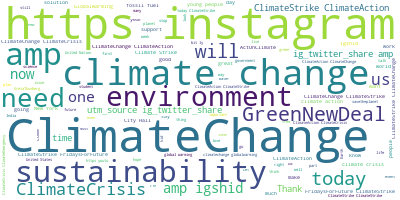

In [11]:
# Importar wordcloud Libreria
from wordcloud import WordCloud
# Unir palabras y caracteres Raw
long_string = ','.join(list(df['text'].values))
# Crear objeto de nube de palabras
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generar nube de palabras
wordcloud.generate(long_string)
# Visualización
wordcloud.to_image()

# Preparación de data, Nubes de tokens y Frecuencia

Definimos funcion para optimizar incluyendo stem y Lematización

In [12]:
def textprep(line):
    tokens = nltk.word_tokenize(str(line))
    tokens = [w.lower() for w in tokens if len(w)>1]
    tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
    tokens = [w for w in tokens if w not in stop_words_nltk] 
    tokens= [wordnet_lemmatizer.lemmatize(w) for w in tokens]
    tokens= [lancaster.stem(w) for w in tokens]
    return tokens

In [13]:
#Filtramos solo la columna de interés
text_df = df[['text']]
text_df.head()

,text
0,"2020 is the year we #votethemout, the year we ..."
1,Winter has not stopped this group of dedicated...
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...
3,"A year of resistance, as youth protests shape..."
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...


In [14]:
# creación de columna con tokenización de la columna de interés especifica
text_df['tokens_twitter'] = text_df.apply(lambda row: textprep(row['text']), axis=1)
text_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,tokens_twitter
0,"2020 is the year we #votethemout, the year we ...","[2020, year, votethemout, year, climatestrik, ..."
1,Winter has not stopped this group of dedicated...,"[wint, stop, group, ded, clim, act, exampl, fo..."
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,"[week, 55, climatestrik, un, next, week, frida..."
3,"A year of resistance, as youth protests shape...","[year, resist, you, protest, shap, clim, chang..."
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,"[happy, holiday, gret, gretathunberg, climatec..."


Representación Frecuencia Visual del BoW optimizado

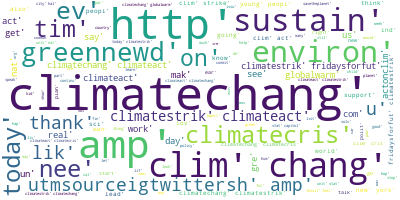

In [15]:
#Convertir Tokens en Lista y Str
tokens_twitter_list=text_df['tokens_twitter'].to_list()
tokens_twitter_str=" ".join([str(item) for item in tokens_twitter_list])
# Crear nube de palabras
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generar nube de palabras
wordcloud.generate(tokens_twitter_str)
# Visualización
wordcloud.to_image()

# Características y representación

Construir el BoW (diccionario) de términos

In [16]:
# Creación del BoW - en gensim es Dictionary
from gensim.corpora import Dictionary
dictionary = Dictionary(text_df.tokens_twitter)
print(dictionary)

Dictionary(77295 unique tokens: ['2020', '33', 'climatestrik', 'don', 'els']...)


In [17]:
# Bag-of-words representacion de documentos.
corpus = [dictionary.doc2bow(line) for line in text_df.tokens_twitter]

In [18]:
for i in corpus[:10]:
    print(i)

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 4)]
[(2, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]
[(0, 1), (2, 1), (6, 1), (15, 1), (16, 1), (17, 1), (24, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2)]
[(0, 1), (2, 1), (15, 1), (16, 1), (17, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2)]
[(2, 1), (17, 1), (49, 1), (51, 1), (52, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (63, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)]
[(2, 1), (17, 2), (36, 1), (50, 1), (52, 1), (54, 1), (56, 1), (57, 1), (78, 1), (79,

Construir matriz de documentos vs términos

In [19]:
# libreria para paralelizar
import multiprocessing as mp
import time

pool = mp.Pool(mp.cpu_count())
doc_term_matrix = pool.map(dictionary.doc2bow, [sentence for sentence in text_df.tokens_twitter])
pool.close()

In [20]:
for i in doc_term_matrix[:10]:
    print(i)

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 4)]
[(2, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]
[(0, 1), (2, 1), (6, 1), (15, 1), (16, 1), (17, 1), (24, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2)]
[(0, 1), (2, 1), (15, 1), (16, 1), (17, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2)]
[(2, 1), (17, 1), (49, 1), (51, 1), (52, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (63, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)]
[(2, 1), (17, 2), (36, 1), (50, 1), (52, 1), (54, 1), (56, 1), (57, 1), (78, 1), (79,

# Modelo no supervisado LDA

Modelo LDA

In [21]:
#from gensim.models.ldamulticore import LdaMulticore

#t0 = time.time()
#lda_model = LdaMulticore(doc_term_matrix, num_topics=20, id2word = dictionary, passes=10, workers=10)
#print(time.time()-t0)

In [ ]:
# Build LDA model Otro modelo lda, tiene otro nombr para no confundirse
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models, similarities
from gensim.models import CoherenceModel


In [42]:
for i in range(15,20):
  lda_model2 = models.LdaModel(corpus=corpus,id2word=dictionary,num_topics=i, passes=5, alpha='auto')

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model2, texts=text_df['tokens_twitter'], dictionary=dictionary, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('Coherence Score :', coherence_lda)


nCoherence Score : 0.37937749235473395


KeyboardInterrupt: ignored

In [23]:
print(lda_model2)

LdaModel(num_terms=77295, num_topics=10, decay=0.5, chunksize=2000)


In [ ]:
for i in range[1,20]:
  from gensim.models import CoherenceModel
  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model2, texts=text_df['tokens_twitter'], dictionary=dictionary, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('nCoherence Score: ', coherence_lda)

In [24]:
def assigntopic(doc):
    vector = lda_model2[dictionary.doc2bow(doc)] 
    # opción 1: todos los tópicos ordenados de mayor a menor, podria ser topN tambien asi: return vector[:5] n=5
    #vector = sorted(vector, key=lambda item: -item[1])
    # opción 2: asignar el tópico mayor a cada documento
    vector = max(vector,key=lambda item: item[1])
    return vector

In [25]:
text_df['topics'] = text_df.apply(lambda row: assigntopic(row['tokens_twitter']), axis=1)
text_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,tokens_twitter,topics
0,"2020 is the year we #votethemout, the year we ...","[2020, year, votethemout, year, climatestrik, ...","(5, 0.7281483)"
1,Winter has not stopped this group of dedicated...,"[wint, stop, group, ded, clim, act, exampl, fo...","(5, 0.49870238)"
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,"[week, 55, climatestrik, un, next, week, frida...","(5, 0.73296744)"
3,"A year of resistance, as youth protests shape...","[year, resist, you, protest, shap, clim, chang...","(5, 0.54494184)"
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,"[happy, holiday, gret, gretathunberg, climatec...","(5, 0.6627134)"
5,10 Questions to Ask Politicians About Climate...,"[10, quest, ask, polit, clim, chang, http, www...","(5, 0.5262059)"
6,#climatestrike #FridaysForFuture #portraits #u...,"[climatestrik, fridaysforfut, portrait, unique...","(5, 0.27700564)"
7,#ClimateChangeIsReal #ClimateStrike #ClimateAc...,"[climatechangeisr, climatestrik, climateaction...","(5, 0.35567006)"
8,My oldest daughter finding inspiration and enc...,"[oldest, daught, find, inspir, enco, fut, read...","(5, 0.45922947)"
9,Our toddler #POTUS whined this week about #Tim...,"[toddl, pot, whin, week, tim, magazin, pick, g...","(7, 0.39961544)"


In [26]:
topic_list = text_df['topics'].to_list()
print(topic_list)

[(5, 0.7281483), (5, 0.49870238), (5, 0.73296744), (5, 0.54494184), (5, 0.6627134), (5, 0.5262059), (5, 0.27700564), (5, 0.35567006), (5, 0.45922947), (7, 0.39961544), (5, 0.51820135), (5, 0.33993828), (5, 0.4552854), (5, 0.68126106), (5, 0.5054947), (5, 0.60001326), (5, 0.52582467), (5, 0.52854204), (5, 0.4499203), (5, 0.49352726), (5, 0.46342766), (5, 0.6491369), (5, 0.46176574), (5, 0.42178726), (5, 0.40519726), (5, 0.57481444), (5, 0.45666727), (5, 0.3480331), (5, 0.4344912), (5, 0.62982976), (5, 0.41384375), (5, 0.49041662), (5, 0.5482574), (2, 0.34893867), (5, 0.44399852), (5, 0.33664337), (5, 0.39642087), (5, 0.42813703), (2, 0.31263703), (5, 0.49041668), (5, 0.72083044), (5, 0.6148976), (2, 0.5898782), (5, 0.5365514), (5, 0.44644284), (5, 0.3213862), (5, 0.33136562), (5, 0.57956576), (1, 0.41966763), (5, 0.6353266), (5, 0.37454203), (5, 0.41374573), (5, 0.39459834), (5, 0.3041516), (5, 0.5038932), (5, 0.44098842), (5, 0.61087126), (5, 0.37657043), (5, 0.49643221), (3, 0.4769241

In [27]:
topic_id = [i[0] for i in topic_list]
print(topic_id)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 2, 5, 5, 5, 2, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5, 5, 4, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 0, 5, 5, 2, 6, 2, 5, 5, 5, 5, 5, 5, 2, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 3, 2, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 1, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 2, 2, 5, 2, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 2, 5, 2, 5, 2, 2, 2, 5, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 2, 5, 2, 5, 5, 5, 2, 5, 2, 2, 

In [28]:
text_df['topic_id'] = topic_id
text_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,tokens_twitter,topics,topic_id
0,"2020 is the year we #votethemout, the year we ...","[2020, year, votethemout, year, climatestrik, ...","(5, 0.7281483)",5
1,Winter has not stopped this group of dedicated...,"[wint, stop, group, ded, clim, act, exampl, fo...","(5, 0.49870238)",5
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,"[week, 55, climatestrik, un, next, week, frida...","(5, 0.73296744)",5
3,"A year of resistance, as youth protests shape...","[year, resist, you, protest, shap, clim, chang...","(5, 0.54494184)",5
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,"[happy, holiday, gret, gretathunberg, climatec...","(5, 0.6627134)",5
5,10 Questions to Ask Politicians About Climate...,"[10, quest, ask, polit, clim, chang, http, www...","(5, 0.5262059)",5
6,#climatestrike #FridaysForFuture #portraits #u...,"[climatestrik, fridaysforfut, portrait, unique...","(5, 0.27700564)",5
7,#ClimateChangeIsReal #ClimateStrike #ClimateAc...,"[climatechangeisr, climatestrik, climateaction...","(5, 0.35567006)",5
8,My oldest daughter finding inspiration and enc...,"[oldest, daught, find, inspir, enco, fut, read...","(5, 0.45922947)",5
9,Our toddler #POTUS whined this week about #Tim...,"[toddl, pot, whin, week, tim, magazin, pick, g...","(7, 0.39961544)",7


In [29]:
tokens_topics_df= text_df[['tokens_twitter','topic_id']]
tokens_topics_df.head(10)

,tokens_twitter,topic_id
0,"[2020, year, votethemout, year, climatestrik, ...",5
1,"[wint, stop, group, ded, clim, act, exampl, fo...",5
2,"[week, 55, climatestrik, un, next, week, frida...",5
3,"[year, resist, you, protest, shap, clim, chang...",5
4,"[happy, holiday, gret, gretathunberg, climatec...",5
5,"[10, quest, ask, polit, clim, chang, http, www...",5
6,"[climatestrik, fridaysforfut, portrait, unique...",5
7,"[climatechangeisr, climatestrik, climateaction...",5
8,"[oldest, daught, find, inspir, enco, fut, read...",5
9,"[toddl, pot, whin, week, tim, magazin, pick, g...",7


In [30]:
text_df.head(10)

,text,tokens_twitter,topics,topic_id
0,"2020 is the year we #votethemout, the year we ...","[2020, year, votethemout, year, climatestrik, ...","(5, 0.7281483)",5
1,Winter has not stopped this group of dedicated...,"[wint, stop, group, ded, clim, act, exampl, fo...","(5, 0.49870238)",5
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,"[week, 55, climatestrik, un, next, week, frida...","(5, 0.73296744)",5
3,"A year of resistance, as youth protests shape...","[year, resist, you, protest, shap, clim, chang...","(5, 0.54494184)",5
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,"[happy, holiday, gret, gretathunberg, climatec...","(5, 0.6627134)",5
5,10 Questions to Ask Politicians About Climate...,"[10, quest, ask, polit, clim, chang, http, www...","(5, 0.5262059)",5
6,#climatestrike #FridaysForFuture #portraits #u...,"[climatestrik, fridaysforfut, portrait, unique...","(5, 0.27700564)",5
7,#ClimateChangeIsReal #ClimateStrike #ClimateAc...,"[climatechangeisr, climatestrik, climateaction...","(5, 0.35567006)",5
8,My oldest daughter finding inspiration and enc...,"[oldest, daught, find, inspir, enco, fut, read...","(5, 0.45922947)",5
9,Our toddler #POTUS whined this week about #Tim...,"[toddl, pot, whin, week, tim, magazin, pick, g...","(7, 0.39961544)",7


In [31]:
# Imprimir Keyword en los topics
pprint(lda_model2.print_topics())
doc_lda = lda_model2[corpus]


[(0,
  '0.037*"environ" + 0.036*"globalwarm" + 0.036*"savetheplanet" + 0.028*"http" '
  '+ 0.015*"ear" + 0.015*"bushfir" + 0.014*"recyc" + 0.011*"wat" + '
  '0.011*"sydney" + 0.010*"us"'),
 (1,
  '0.033*"fuel" + 0.029*"fossil" + 0.027*"produc" + 0.023*"man" + 0.018*"corp" '
  '+ 0.014*"deb" + 0.013*"pack" + 0.012*"del" + 0.012*"smart" + 0.011*"buy"'),
 (2,
  '0.144*"climatestrik" + 0.043*"fridaysforfut" + 0.034*"gretathunberg" + '
  '0.031*"today" + 0.021*"stud" + 0.018*"dc" + 0.013*"protest" + '
  '0.013*"school" + 0.012*"strike" + 0.012*"young"'),
 (3,
  '0.053*"capitol" + 0.030*"hal" + 0.020*"firedrillfriday" + 0.018*"town" + '
  '0.013*"est" + 0.013*"janefond" + 0.013*"nashvil" + 0.013*"stat" + '
  '0.012*"night" + 0.011*"provid"'),
 (4,
  '0.036*"utmsourceigtwittersh" + 0.029*"le" + 0.022*"amp" + 0.017*"food" + '
  '0.014*"project" + 0.013*"research" + 0.013*"develop" + 0.010*"top" + '
  '0.010*"fre" + 0.009*"impact"'),
 (5,
  '0.045*"climatechang" + 0.029*"sustain" + 0.021*"clim"

In [32]:
len(doc_lda)
len(lda_model2.print_topics())

10

Analizando Resultados del LDA 

In [33]:
#from pyLDAvis 
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [34]:
# Visualize the topics
pyLDAvis.enable_notebook()

#LDAvis_data_filepath = os.path.join(')
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model2, corpus, dictionary)
    with open("/content/cloned-repo/Trabajo3/out", 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open("/content/cloned-repo/Trabajo3/out", 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/cloned-repo/Trabajo3/out.html')
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.361070  0.000542       1        1  47.577066
0     -0.227801 -0.240495       2        1  12.841012
2     -0.133470  0.359269       3        1  11.049186
8      0.033767  0.016694       4        1   6.016935
6      0.125638  0.011394       5        1   5.246726
4      0.048226 -0.067633       6        1   5.028413
9      0.150780  0.009310       7        1   3.813139
7      0.070716 -0.082824       8        1   3.619367
3      0.146478  0.000349       9        1   2.740352
1      0.146736 -0.006605      10        1   2.067804, topic_info=              Term          Freq         Total Category  logprob  loglift
126                 14582.000000  14582.000000  Default  30.0000  30.0000
2     climatestrik  18399.000000  18399.000000  Default  29.0000  29.0000
250            amp  11691.000000  11691.000000  Default  28.0000  28.0000
80     climatecris   8449.000000   8449.000000  Default  27.0000  27.0000
52    climatechang  25212.000000  25212.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
4366           leg    125.597455    126.555752  Topic10  -5.2447   3.8711
5600         petit    122.807835    123.766144  Topic10  -5.2671   3.8709
8844         lunch    120.880473    121.838909  Topic10  -5.2830   3.8708
230           fund    199.737493    328.434295  Topic10  -4.7808   3.3814
467            bad    197.603116    340.442796  Topic10  -4.7915   3.3347

[418 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
126       7  0.999952              
1556      6  0.996255            15
1167      6  0.995488           1st
1313      7  0.993396          2050
4764      5  0.997474        accord
...     ...       ...           ...
66        3  0.970948           you
210       1  0.102604         young
210       3  0.896495         young
1848      7  0.998209  youthforclim
4749      7  0.994872            yr

[506 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 3, 9, 7, 5, 10, 8, 4, 2])

Guardar Topics

In [35]:
lda_model2.save('Lda_Model')

In [36]:
model =  models.LdaModel.load('Lda_Model')

Evaluación del modelo

In [39]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model2, texts=text_df['tokens_twitter'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)


Coherence Score:  0.3772035069755679


# Clasificación y análisis de sentimientos

# REFERENCIAS 

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0